1. POPULARITY RANKING (Millions of Journeys):
        JOURNEY_TYPE  JOURNEYS_MILLIONS
0                Bus       24905.193947
1  Underground & DLR       15020.466544
2         Overground        1666.845666
3           TfL Rail         411.313421
4               Tram         314.689875
5   Emirates Airline          14.583718

2. EMIRATES AIRLINE PEAK (MAY 2012):
     MONTH  YEAR  JOURNEYS_MILLIONS
652      5  2012           0.534218
653      6  2012           0.381347
651      4  2012           0.236025
664      5  2013           0.194817
688      5  2015           0.192611

3. LOWEST UNDERGROUND TRAFFIC YEARS (2020 CRISIS):
    YEAR  JOURNEYS_MILLIONS
10  2020         310.179316
11  2021         748.452544
12  2022        1064.859009
0   2010        1096.145588
1   2011        1156.647654


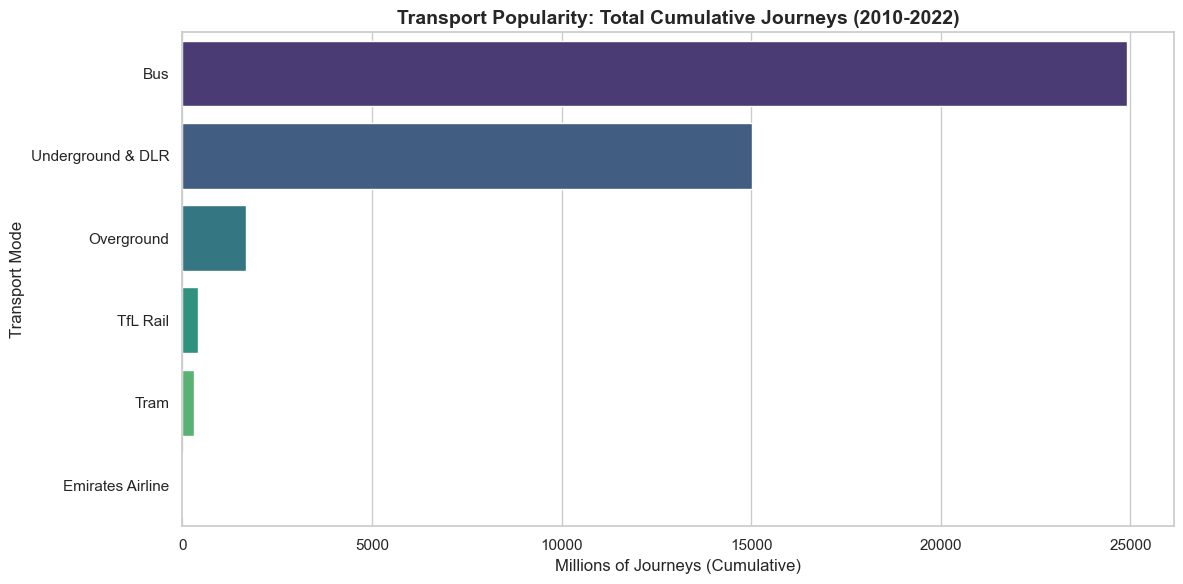

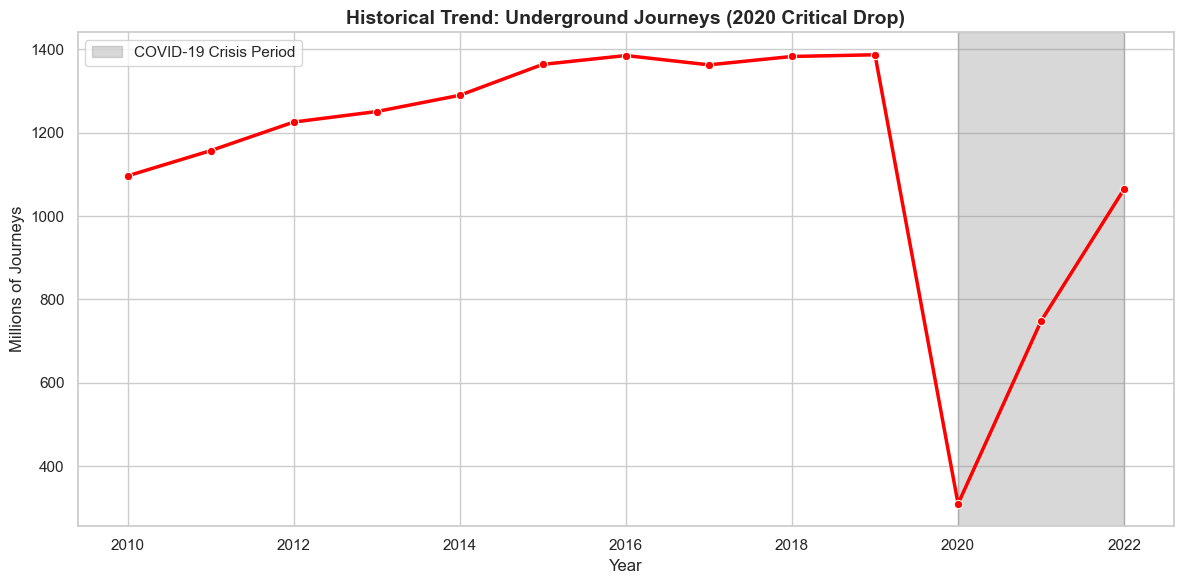

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 0. ENSURE IMAGES DIRECTORY EXISTS
if not os.path.exists('images'):
    os.makedirs('images')

# 1. DATA LOADING AND PREPARATION
# Load dataset from the 'data' subfolder
df = pd.read_csv('data/tfl_journeys_final.csv')

# Normalize column names to UPPERCASE for consistency
df.columns = [col.upper() for col in df.columns]

# --- DATA ANALYSIS SECTION ---

# RESULT 1: Most popular transport types (Cumulative)
most_popular_transport_types = df.groupby('JOURNEY_TYPE')['JOURNEYS_MILLIONS'].sum().sort_values(ascending=False).reset_index()

# RESULT 2: Popularity peak for Emirates Airline (Cable Car)
# Identifying the historical maximum for the 2012 Olympics period
emirates_airline_popularity = df[df['JOURNEY_TYPE'] == 'Emirates Airline'].sort_values(by='JOURNEYS_MILLIONS', ascending=False).head(5)

# RESULT 3: Historical evolution and critical years for the Underground (Tube)
tube_data = df[df['JOURNEY_TYPE'].str.contains('Underground', na=False)]
tube_trend = tube_data.groupby('YEAR')['JOURNEYS_MILLIONS'].sum().reset_index()
least_popular_years_tube = tube_trend.sort_values(by='JOURNEYS_MILLIONS').head(5)

# --- TECHNICAL RESULTS OUTPUT ---
print("1. POPULARITY RANKING (Millions of Journeys):")
print(most_popular_transport_types)
print("\n2. EMIRATES AIRLINE PEAK (MAY 2012):")
print(emirates_airline_popularity[['MONTH', 'YEAR', 'JOURNEYS_MILLIONS']])
print("\n3. LOWEST UNDERGROUND TRAFFIC YEARS (2020 CRISIS):")
print(least_popular_years_tube)

# --- VISUALIZATION GENERATION ---
sns.set_theme(style="whitegrid")

# PLOT 1: Popularity Ranking Bar Chart

plt.figure(figsize=(12, 6))
sns.barplot(data=most_popular_transport_types, x='JOURNEYS_MILLIONS', y='JOURNEY_TYPE', palette='viridis')
plt.title('Transport Popularity: Total Cumulative Journeys (2010-2022)', fontsize=14, fontweight='bold')
plt.xlabel('Millions of Journeys (Cumulative)', fontsize=12)
plt.ylabel('Transport Mode', fontsize=12)
plt.tight_layout()
plt.savefig('images/london_transport_ranking_en.png')
plt.show()

# PLOT 2: Underground Historical Trend & Pandemic Impact

plt.figure(figsize=(12, 6))
sns.lineplot(data=tube_trend, x='YEAR', y='JOURNEYS_MILLIONS', marker='o', color='red', linewidth=2.5)
# Highlight the COVID-19 impact area
plt.axvspan(2020, 2022, color='gray', alpha=0.3, label='COVID-19 Crisis Period')
plt.title('Historical Trend: Underground Journeys (2020 Critical Drop)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Millions of Journeys', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('images/london_underground_trend_en.png')
plt.show()